## Computer Vision - ASSIGNMENT 1

In Assignment 0, we solved a binary classification problem for tabular data by using a simple Multilayer Perceptron (MLP). The aim was to familiarise yourself with some basic commands to implement a Deep Learning (DL) model and to emphasise the importance of knowing your data. We are now ready to move on to the next level!

Here, we will work with Convolutional Neural Networks (CNNs). As you have learn during this course, there are some families of DL architectures that are more suitable for a particular task depending on the problem to be solved, the data you are working with, etc. Introduced by Yann LeCun in 1989, CNNs have been the most used architectures when it comes to Computer Vision applications like Image Classification (until the Transformers came along, but that is a different topic...). 

In this assignment, we aim to implement a CNN in order to *classify images of 10 different animals*. One could wonder, is classifying animals that useful? And the answer is.. probably not! But think about the big picture: you could learn to classify (and diagnose) a specific disease based on medical images, for instance. We will split this assignment in 4 sections:

* EDA and Data Preprocessing
* CNN Implementation
* Data Augmentation
* Transfer Learning

The first step is to understand our data. As we are working with images, we will focus on gaining some knowledge about the distribution of our data and how to deal with it, as well as displaying some image examples. Then, we will prepare the data to be fed in our CNN. Then, we will implement a basic Convolutional Neural Network to train our multiclass classifier since we deal with images as our input. We will also apply some data augmentation to see the influence of this technique during training. Finally, we will make use of a pre-existing model from the Keras library - namely VGG16, one of the very first "well-known" convolution-based architectures. We will experiment with what is called *Transfer learning*, a really common practice in the DL world in which we simply make use of pre-existing weight values (features) for our architecture. Those pre-existing values were obtained by training the architecture on a large corpus of images (ImageNet) and can be used to accelerate the training process.

Let's start!

**NOTE**: 
- Our model deployment will be carried out with **TensorFlow**. In Kaggle, we can make use of some free GPUs available to speed up the training process. To run notebooks with GPU (we will really need it in this assignment), select the GPU P100 option in the accelerator setting. You will find this option by clicking in the Notebook Settings tab.
- In Keras, there are two ways of defining a model: Sequential (as previous assignment) and Functional API. In this assignment, we are going to use the Keras Functional API. To get familiar with this flexible way to create models, please take a quick look to the Introduction section in [this tutorial](https://www.tensorflow.org/guide/keras/functional#introduction).

**IMPORTANT**:
Througout the different tasks in this assignment, you will find some questions marked as **Q**. These questions must be answered at the end of the Notebook (there is a Markdown cell prepared for this purpose).

### EDA and Data Preprocessing

The first thing you'll need to do is to load the dataset from Kaggle. To do that, we need to add the dataset to our notebook. This can be done by clicking in *Add data* in the top-right corner of the notebook and searching for **Animals-10** (Corrado Alessio). Once the dataset has been added (it should appear in our notebook's input, again in the top-right corner), we can start. If you want to learn more about the information contained in this dataset, check https://www.kaggle.com/datasets/alessiocorrado99/animals10.

In [8]:
# Imports
import pandas as pd
import time

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from pathlib import PurePosixPath as PPP

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from PIL import Image

**Task 1**

As you can see, our data is stored by classes. Our first task is to read the dataset and create the independent variable containing our ground truth (labels) for the classification task. Once we have created our array containing the values of the ground truth, we can store them in a dataframe (we are already familiar with Pandas). Store the name of the file and its associated category in a dataframe.

In [9]:
# Read all files
raw_path = "../input/animals10/raw-img"
filename_data = []
for (dirpath, dirnames, filenames) in os.walk(raw_path):
    if '.py' in filenames: continue # Skip python file included in the main folder
    filename_data  += [str(PPP(dirpath).joinpath(file)) for file in filenames]
# print(filename_data)

In [10]:
# filename_data[1].split('/')[-2]

In [11]:
# raw_path = "../input/animals10/raw-img"
# print(f"Does path exist? {os.path.exists(raw_path)}")
# print(f"Is it a directory? {os.path.isdir(raw_path)}")

In [12]:
# Ground truth
categories = []

# Loop over the filenames and use "split" to get the category name.
for file in filename_data:
    categories.append(file.split('/')[-2]) 

In [13]:
# Create a dataframe containing the names of the files and the categories. Use 'filename' and 'labels' as column names.
df =  pd.DataFrame({
    'filename': filename_data,
    'labels': categories
})

# Show random samples
df.sample(n=9, random_state=6)

filename      labels
15728  ../input/animals10/raw-img/ragno/OIP-iwCUr4LMK...       ragno
7601   ../input/animals10/raw-img/scoiattolo/OIP-kOqk...  scoiattolo
24239  ../input/animals10/raw-img/farfalla/e830b30a20...    farfalla
7024   ../input/animals10/raw-img/gatto/erik-jan-leus...       gatto
6592   ../input/animals10/raw-img/gatto/ea37b90f2df00...       gatto
11392  ../input/animals10/raw-img/gallina/OIP-XfItM10...     gallina
12829  ../input/animals10/raw-img/ragno/OIP-ZpwpGFxf1...       ragno
23908  ../input/animals10/raw-img/cane/OIP-L3uhY0AO6Z...        cane
1218   ../input/animals10/raw-img/cavallo/OIP-Fna4uXP...     cavallo

In [14]:
# # Read all files
# raw_path = "../input/animals10/raw-img"
# filename_data = []
# for (dirpath, dirnames, filenames) in os.walk(raw_path):
#     if '.py' in filenames: continue # Skip python file included in the main folder
#     filename_data  += [str(PPP(dirpath).joinpath(file)) for file in filenames]
# print(filename_data)
    

        
# Create a dataframe containing the names of the files and the categories. Use 'filename' and 'labels' as column names.


As you can see, the original dataset is in Italian. Let's make use of the dictionary contained in *translate.py* to translate the labels. It will be much easier to work in English :)

In [15]:
# Dictionary
label_mapping = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", 
                 "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel","ragno": "spyder"}


In [16]:
# Use .map() function to translate the 'labels' column
df['labels'] = df['labels'].map(label_mapping) # Type your solution here.

In [17]:
# Show same random samples
df.sample(n=9, random_state=6)

filename     labels
15728  ../input/animals10/raw-img/ragno/OIP-iwCUr4LMK...     spyder
7601   ../input/animals10/raw-img/scoiattolo/OIP-kOqk...   squirrel
24239  ../input/animals10/raw-img/farfalla/e830b30a20...  butterfly
7024   ../input/animals10/raw-img/gatto/erik-jan-leus...        cat
6592   ../input/animals10/raw-img/gatto/ea37b90f2df00...        cat
11392  ../input/animals10/raw-img/gallina/OIP-XfItM10...    chicken
12829  ../input/animals10/raw-img/ragno/OIP-ZpwpGFxf1...     spyder
23908  ../input/animals10/raw-img/cane/OIP-L3uhY0AO6Z...        dog
1218   ../input/animals10/raw-img/cavallo/OIP-Fna4uXP...      horse

In [18]:
# # Dictionary
# label_mapping = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", 
#                  "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel","ragno": "spyder"}

# # Use .map() function to translate the 'labels' column
# df['labels'] =  # Type your solution here.

# # Show same random samples
# df.sample(n=9, random_state=6)

**Task 2**

Use the "labels" of the dataframe and value_counts() to plot a bar plot showing the class distribution of the data.

**Q1**: As you can see, the data is not equally distributed. An alternative could be to resampling our dataset (oversampling or undersampling) until the dataset is balanced. In our case, we will not consider this but, can you think of ways to solved the imbalanced data issue? Do you know any particular application where data is usually highly unbalanced?

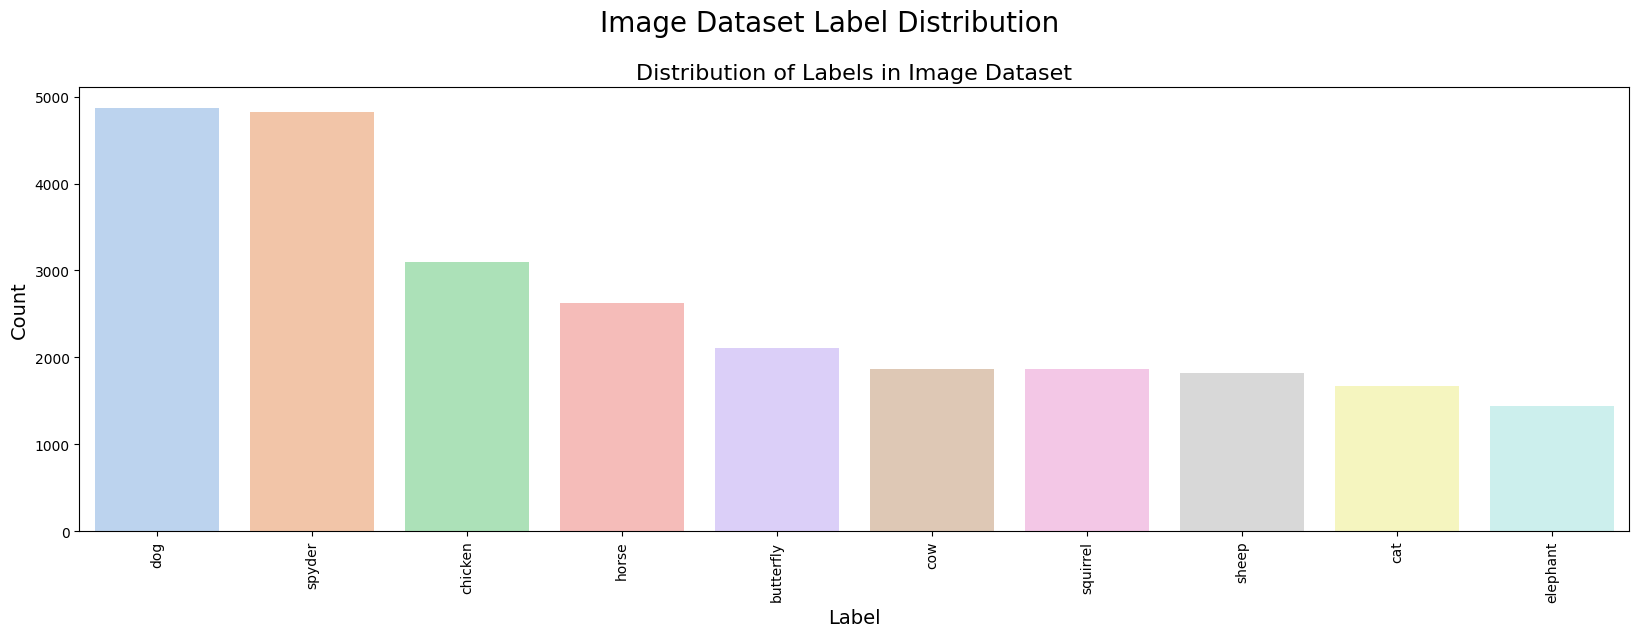

Number of images per category : 
labels
dog          4863
spyder       4821
chicken      3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: count, dtype: int64


In [19]:
# Get the value counts for each label
label_counts =  df['labels'].value_counts() # Type your solution here.

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

# Plot the bar chart
sns.barplot(x=label_counts.index, y=label_counts, alpha=0.8, palette='pastel', ax=axes) # Type your solution here.
axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=90)

# Add a super-title to the figure
fig.suptitle('Image Dataset Label Distribution', fontsize=20)

# Adjust the spacing between the plots and the title
fig.subplots_adjust(top=0.85)

# Display the plot
plt.show()

print("Number of images per category : ")
print(label_counts)

**Task 3** 

Once we have loaded the dataset, we will proceed to show some examples. Plot the same random samples we have been showing before to get an idea of how our data looks like. You will see that images have different shape, but we will fix that later.

In [20]:
sample_df =  df.sample(n=9, random_state=6)

In [21]:
sample_df

filename     labels
15728  ../input/animals10/raw-img/ragno/OIP-iwCUr4LMK...     spyder
7601   ../input/animals10/raw-img/scoiattolo/OIP-kOqk...   squirrel
24239  ../input/animals10/raw-img/farfalla/e830b30a20...  butterfly
7024   ../input/animals10/raw-img/gatto/erik-jan-leus...        cat
6592   ../input/animals10/raw-img/gatto/ea37b90f2df00...        cat
11392  ../input/animals10/raw-img/gallina/OIP-XfItM10...    chicken
12829  ../input/animals10/raw-img/ragno/OIP-ZpwpGFxf1...     spyder
23908  ../input/animals10/raw-img/cane/OIP-L3uhY0AO6Z...        dog
1218   ../input/animals10/raw-img/cavallo/OIP-Fna4uXP...      horse

In [22]:
for index, row in sample_df.iterrows():
    filename =  row["filename"]# Type your solution here.
    category =  row["labels"] # Type your solution here.
    print(filename)

../input/animals10/raw-img/ragno/OIP-iwCUr4LMKoRSehHppbpKUwHaE7.jpeg
../input/animals10/raw-img/scoiattolo/OIP-kOqkSSe6dFRuDPP3a7l70wHaF_.jpeg
../input/animals10/raw-img/farfalla/e830b30a20f6053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
../input/animals10/raw-img/gatto/erik-jan-leusink-561776-unsplash.jpg
../input/animals10/raw-img/gatto/ea37b90f2df0063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
../input/animals10/raw-img/gallina/OIP-XfItM10jklbjY3q6pkhkqgHaFj.jpeg
../input/animals10/raw-img/ragno/OIP-ZpwpGFxf1qY7_frh1n8dFgHaHa.jpeg
../input/animals10/raw-img/cane/OIP-L3uhY0AO6ZauTN13v1qTTwHaE6.jpeg
../input/animals10/raw-img/cavallo/OIP-Fna4uXP4qD5diCbSiPy4FAHaE0.jpeg


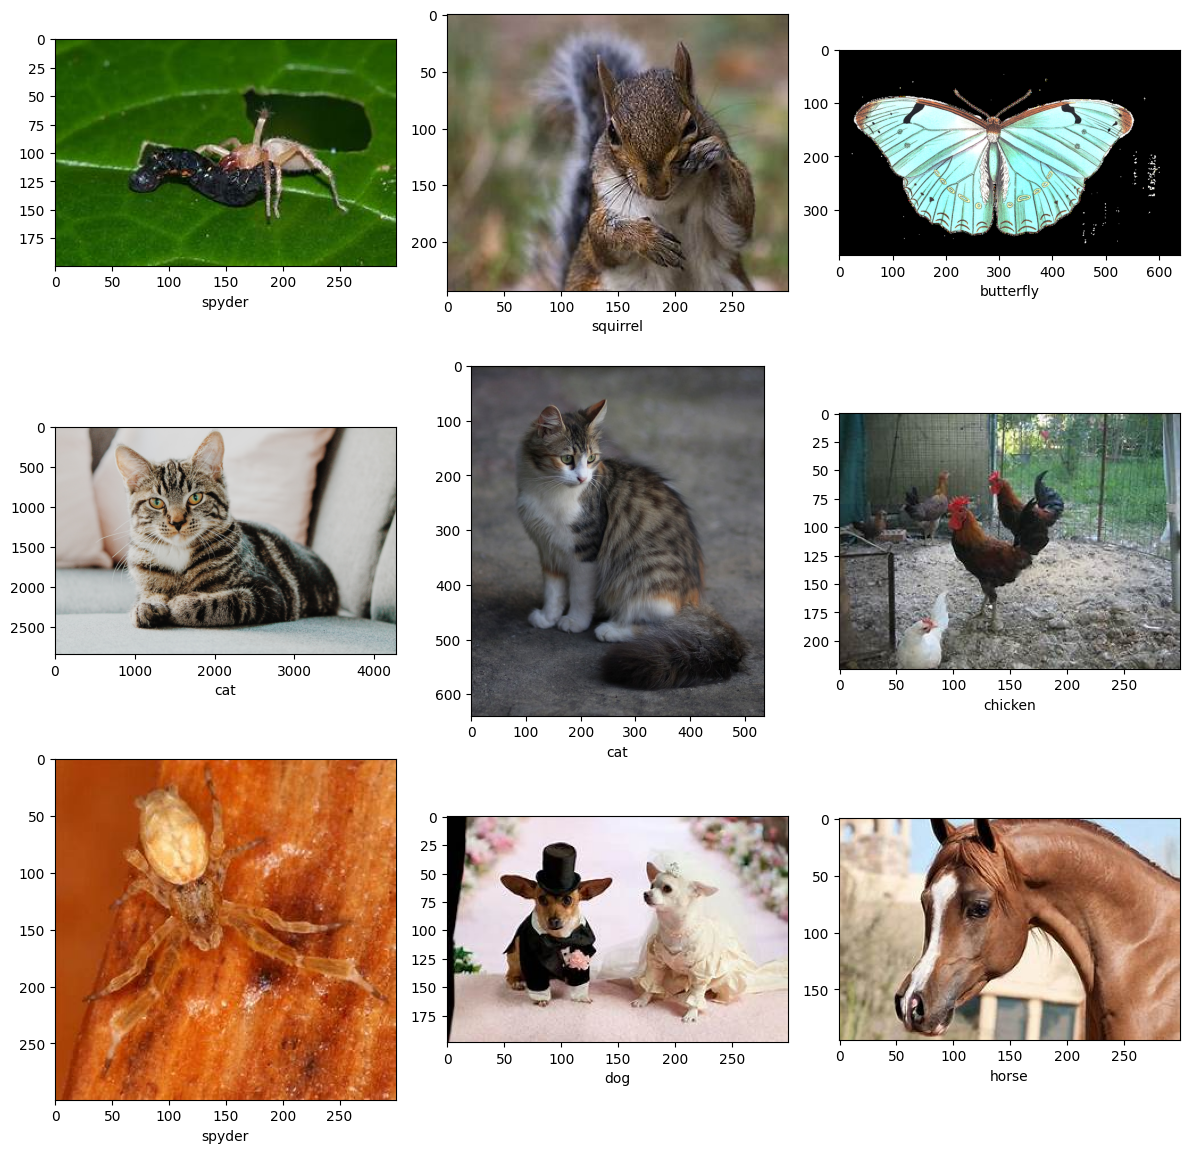

In [23]:
# Extract 9 random samples using random_state=6. Remember to reset indexes with reset_inex()
sample_df =  df.sample(n=9, random_state=6).reset_index()

plt.figure(figsize=(12, 12))
for index, row in sample_df.iterrows():
    filename =  row["filename"]# Type your solution here.
    category =  row["labels"] # Type your solution here.
    img = Image.open(filename).convert("RGB")
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(category)
plt.tight_layout()
plt.show()

**Task 4**

We need to convert the non-numerical variables (categorical) to numerical. In this case, we will make use of the LabelEncoder() function to encoder our labels and store them in a new "encoded_labels" column.

In [24]:
# Create a encoder object
lb = LabelEncoder() # Type your solution here.

# Use fit_transform to fit the data and encode it
df['encoded_labels'] = lb.fit_transform(df['labels']) # Type your solution here.

# Show same random samples
df.sample(n=9, random_state=6)

filename     labels  \
15728  ../input/animals10/raw-img/ragno/OIP-iwCUr4LMK...     spyder   
7601   ../input/animals10/raw-img/scoiattolo/OIP-kOqk...   squirrel   
24239  ../input/animals10/raw-img/farfalla/e830b30a20...  butterfly   
7024   ../input/animals10/raw-img/gatto/erik-jan-leus...        cat   
6592   ../input/animals10/raw-img/gatto/ea37b90f2df00...        cat   
11392  ../input/animals10/raw-img/gallina/OIP-XfItM10...    chicken   
12829  ../input/animals10/raw-img/ragno/OIP-ZpwpGFxf1...     spyder   
23908  ../input/animals10/raw-img/cane/OIP-L3uhY0AO6Z...        dog   
1218   ../input/animals10/raw-img/cavallo/OIP-Fna4uXP...      horse   

       encoded_labels  
15728               8  
7601                9  
24239               0  
7024                1  
6592                1  
11392               2  
12829               8  
23908               4  
1218                6

In [25]:
df

filename     labels  \
0      ../input/animals10/raw-img/cavallo/OIP-mdvOxIW...      horse   
1      ../input/animals10/raw-img/cavallo/OIP-TPYKs3X...      horse   
2      ../input/animals10/raw-img/cavallo/OIP-jlVRrok...      horse   
3      ../input/animals10/raw-img/cavallo/OIP-F4QVZ71...      horse   
4      ../input/animals10/raw-img/cavallo/OIP-UFtUZnX...      horse   
...                                                  ...        ...   
26174  ../input/animals10/raw-img/farfalla/OIP-4P7_7D...  butterfly   
26175  ../input/animals10/raw-img/farfalla/OIP-QeS6A5...  butterfly   
26176  ../input/animals10/raw-img/farfalla/OIP-1fQ1-C...  butterfly   
26177  ../input/animals10/raw-img/farfalla/eb32b60920...  butterfly   
26178  ../input/animals10/raw-img/farfalla/ea36b20c29...  butterfly   

       encoded_labels  
0                   6  
1                   6  
2                   6  
3                   6  
4                   6  
...               ...  
26174               0  
26175               0  
26176               0  
26177               0  
26178               0  

[26179 rows x 3 columns]

**Task 5** 

Time to prepare the data for the architecture! Remember that we already have the dataframe containing the names and class of each image. We will split in training, validation and test. Make use of the dataframe to obtain a train set with 80% of the data. The remaining data will be equally divided into validation and test set. Use train_test_split() funtion including *suffle=True* , *random_state=0* and *stratify* arguments when splitting. More info here https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
# Split dataset
train_df, Temp_df = train_test_split(df, train_size=0.8, shuffle=True, 
                                     random_state=0, stratify=df['labels'])  # Type your solution here
valid_df, test_df = train_test_split(Temp_df, train_size=0.5, shuffle=True, 
                                     random_state=0, stratify=Temp_df['labels']) # Type your solution here

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Convert labels to int
train_df["encoded_labels"] = train_df['encoded_labels'].astype(np.int32)
valid_df["encoded_labels"] = valid_df['encoded_labels'].astype(np.int32)
test_df["encoded_labels"] = test_df['encoded_labels'].astype(np.int32)

print("Shape of the training set:", train_df.shape)
print("Shape of the validation set:", valid_df.shape)
print("Shape of the testing set:", test_df.shape)

Shape of the training set: (20943, 3)
Shape of the validation set: (2618, 3)
Shape of the testing set: (2618, 3)


**Task 6**

For feeding the data into our model, we will make use of the *tf.data*. This API enables you to build complex input pipelines from simple, reusable pieces ([Documentation](https://www.tensorflow.org/guide/data)). Here, we can specifiy your input data, use some of the predefined transforming/preprocessing methods included, and set some basic configuration settings for training. In Assignmnet 0, we already made use of this API for inputting our tabular data in the model (do you remember creating a *dataset* object with *Dataset.from_tensor_slices()*?). Let's explore this API in depth.

The ideas is to create an input pipeline that performs the reading, preprocessing and preparation of the data. To do so, we will implement two different functions: 

**Image_preprocessing**: It contains the preprocessing steps.
- Read the raw image with *tf.io.read_file*.
- Decode the raw data as a 3-channel image with *tf.io.decode_jpeg*.
- Resize the image to (224,224) with *tf.image.resize*.
- Rescale (normalize) the image with a factor 1./255.

**Create_dataset**: It builds the pipeline.
- Create a dataset with a separate element for each row of the input with *Dataset.from_tensor_slices*.
- Apply the preprocessing function across the elements of the dataset with the *map()* method.
- Combines consecutive elements of this dataset into batches with the *batch()* method.

**Notes**: 
- *tf.data.AUTOTUNE* dynamically tune the level of parallelism at runtime.
- *prefetch()* method allows later elements to be prepared while the current element is being processed, improving latency.

In [27]:
from tensorflow.data import Dataset
import tensorflow as tf

def image_preprocessing(path_image, labels):
    
    # Read raw image
    image =  tf.io.read_file(path_image) # Type your solution here
    
    # Decode raw image, add argument channels=3
    image =  tf.io.decode_jpeg(image, channels=3) # Type your solution here
     
    # Resize image    
    image = tf.image.resize(image, [224,224]) # Type your solution here
     
    # Scale image   
    image = image / 255 # Type your solution here
   
    return image, labels


def create_dataset(data, batch_size):
    
    # Create dataset object. Use (data['filename'], data['encoded_labels']) as input data.
    dataset = tf.data.Dataset.from_tensor_slices((data['filename'], data['encoded_labels']))  # Type your solution here
    
    # Map the image_processing function
    dataset = dataset.map(image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE) # Type your solution here
    
    # Add batch information
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE) # Type your solution here
    
    return dataset

You should be able to run the following cell without issues if the implementation of the pipeline is correct. Check the follwoing:
- feature batch shape: $(32,224,224,3)$
- label batch shape $(32,)$
- Label sample and the image match
- Minimum pixel value of 0.0 and maximun pixel value of 1.0

Feature batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)


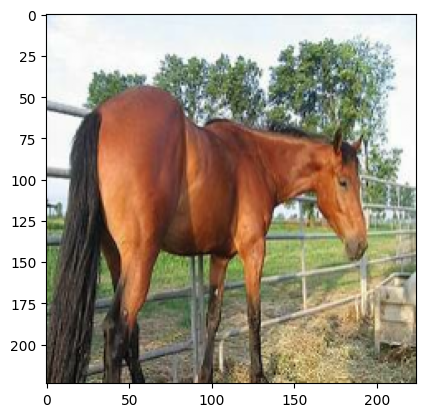

Label: ['horse']
Minimum pixel value: 0.0, Maximum pixel value: 1.0


In [28]:
train_dataset = create_dataset(train_df, batch_size=32)
valid_dataset = create_dataset(valid_df, batch_size=32)

# Display image and label.
img, lab = next(iter(train_dataset))

print(f"Feature batch shape: {img.shape}")
print(f"Labels batch shape: {lab.shape}")
img = img[0]
label = lab[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {lb.inverse_transform([label])}")
print(f"Minimum pixel value: {np.min(img)}, Maximum pixel value: {np.max(img)}")

### CNN Implementation

Time to implement our classifier! We will first create our "homemade" model. Later on, we will make use of one of the well-known architectures instead. Unlike Assignment 0, dealing with images is computacionally heavy so the trainining process is slower. Please, make sure you followed the steps mentioned in the introduction of this Notebook to use of the Kaggle's GPUs. We will run just a few epochs (around 10 min), but take into account that, in real applications, training can last for thousands of epochs depending on the task.

**Task 7** 

Create a 4-layer CNN with 16, 32, 64 and 64 units respectively with a kernel size of 3 and Rectified Linear Unit as activation function. Add a BatchNormalization and MaxPooling2D with pool size (2,2) after each CNN layer. Then, include a Dropout layer for regularization and a Flatten layer to prepare the features to the classifier layer. Finally, add 2 Dense layers corresponding to an extra FC layer and the classifier. To see a summary of the model, call the *summary()* method.

**Q2**: Two of the important ideas that CNNs leverages are *sparse interaction* (or locally connected layers) and *parameter sharing*. Explain briefly both of them.

In [29]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D, Input, BatchNormalization
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

# For speeding up training but with lower precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Which input shape? Remember to include the number of channels...
input_shape =  (224, 224, 3) # Type your solution here.

# How many classes?
num_classes =  10 # Type your solution here.

def create_basic_model(input_shape):
    
    # Use the Input layer with the right input shape
    inputs = Input(shape=input_shape) # Type your solution here
    
    initializer = tf.keras.initializers.glorot_normal(seed=0)
    
    # Basic CNN model. CNN-BatchNorm-MaxPool. Type your solution here. 
    x = Conv2D(16,(3,3),activation='relu', kernel_initializer=initializer)(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(32,(3,3),activation='relu', kernel_initializer=initializer)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(64,(3,3),activation='relu', kernel_initializer=initializer)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(64,(3,3),activation='relu', kernel_initializer=initializer)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    # Add a Dropout with prob. 0.5
    x =  Dropout(0.5)(x) # Type your solution here
    
    # Flatten the output layer to 1 dimension.
    x =  Flatten()(x) # Type your solution here
    
    # Add a Dense layer with 128 hidden units and ReLU activation.
    x = Dense(128, activation='relu', kernel_initializer=initializer)(x) # Type your solution here
    
    # Add the final layer (classifier) with the right activation.
    output = Dense(num_classes,activation='softmax', kernel_initializer=initializer)(x) # Type your solution here
    
    # Create a Model with the right input and output
    model =  Model(inputs=inputs, outputs=output) # Type your solution here
    
    # Show a summary of the model to make sure there are no disconnected elements.
    # Type your solution here
    model.summary()
    return model

In [30]:
create_basic_model(input_shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,242,282 (4.74 MB)

 Trainable params: 1,241,930 (4.74 MB)

 Non-trainable params: 352 (1.38 KB)

<Functional name=functional_1, built=True>

**Task 8**

Let's train the model! 

First, we will define the learning rate. It is often useful to lower the learning rate as the training progresses. A learning rate schedule applies a decay function to an optimizer step, given a provided initial learning rate. In this case, we will use an exponential decay. We will monitor the learning rate by implementing a Keras Callback.

**Note**: A step usually refers to the process of applying forward pass and backward pass on a mini-batch.

In [31]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=0.01,
                    decay_steps=train_df.shape[0] // 32, # decay per epoch
                    decay_rate=0.95,
                    staircase=True
                )

for x in range(10000):
    if x % lr_schedule.decay_steps == 0:  print(f"Learning rate at step {x}: {lr_schedule(x).numpy()}")

Learning rate at step 0: 0.009999999776482582
Learning rate at step 654: 0.009499999694526196
Learning rate at step 1308: 0.009024999104440212
Learning rate at step 1962: 0.008573749102652073
Learning rate at step 2616: 0.008145062252879143
Learning rate at step 3270: 0.007737808860838413
Learning rate at step 3924: 0.007350918371230364
Learning rate at step 4578: 0.0069833723828196526
Learning rate at step 5232: 0.006634203717112541
Learning rate at step 5886: 0.006302493158727884
Learning rate at step 6540: 0.0059873685240745544
Learning rate at step 7194: 0.005688000004738569
Learning rate at step 7848: 0.005403600167483091
Learning rate at step 8502: 0.00513342022895813
Learning rate at step 9156: 0.004876748658716679
Learning rate at step 9810: 0.004632911179214716


In [32]:
from tensorflow.keras.callbacks import Callback

class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'Epoch {epoch+1}: Learning rate is {lr.numpy()}')

Use fit() with the dataset objects that we have already defined (validation and training). Run it for 20 epochs with SGD optimizer and our learning rate schedule. Display the accuracy during training. Plot the curves (loss and accuracy).

In [33]:
# Create model
model =  create_basic_model(input_shape) # Type your solution here.

# # Use compile with the right loss, optimizer and metrics
# model.compile(loss=", # Type your solution here.
#               optimizer=, # Type your solution here.
#               metrics=) # Type your solution here.

model.compile(loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              optimizer='SGD',
              metrics=['accuracy'])


print("Initial learning rate: ", lr_schedule.initial_learning_rate)

# Training
history = model.fit(
    x= train_dataset, # Type your solution here (use the training dataset)
    validation_data=valid_dataset, # Type your solution here (use the validation dataset),
    epochs=20, # Type your solution here
    verbose=2,
    callbacks=LearningRateLogger()
)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,242,282 (4.74 MB)

 Trainable params: 1,241,930 (4.74 MB)

 Non-trainable params: 352 (1.38 KB)

Initial learning rate:  0.01
Epoch 1/20


I0000 00:00:1725792289.793572      76 service.cc:145] XLA service 0x7b0d78006660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725792289.793634      76 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1725792296.375160      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1: Learning rate is 0.009999999776482582
655/655 - 50s - 76ms/step - accuracy: 0.3906 - loss: 1.8523 - val_accuracy: 0.4702 - val_loss: 1.5550
Epoch 2/20
Epoch 2: Learning rate is 0.009999999776482582
655/655 - 16s - 24ms/step - accuracy: 0.5451 - loss: 1.3274 - val_accuracy: 0.5665 - val_loss: 1.2811
Epoch 3/20
Epoch 3: Learning rate is 0.009999999776482582
655/655 - 16s - 24ms/step - accuracy: 0.6028 - loss: 1.1510 - val_accuracy: 0.4763 - val_loss: 1.6872
Epoch 4/20
Epoch 4: Learning rate is 0.009999999776482582
655/655 - 15s - 23ms/step - accuracy: 0.6515 - loss: 1.0091 - val_accuracy: 0.5248 - val_loss: 1.5495
Epoch 5/20
Epoch 5: Learning rate is 0.009999999776482582
655/655 - 16s - 24ms/step - accuracy: 0.6936 - loss: 0.8873 - val_accuracy: 0.6119 - val_loss: 1.2210
Epoch 6/20
Epoch 6: Learning rate is 0.009999999776482582
655/655 - 15s - 23ms/step - accuracy: 0.7280 - loss: 0.7895 - val_accuracy: 0.5924 - val_loss: 1.3499
Epoch 7/20
Epoch 7: Learning rate is 0.009999999776

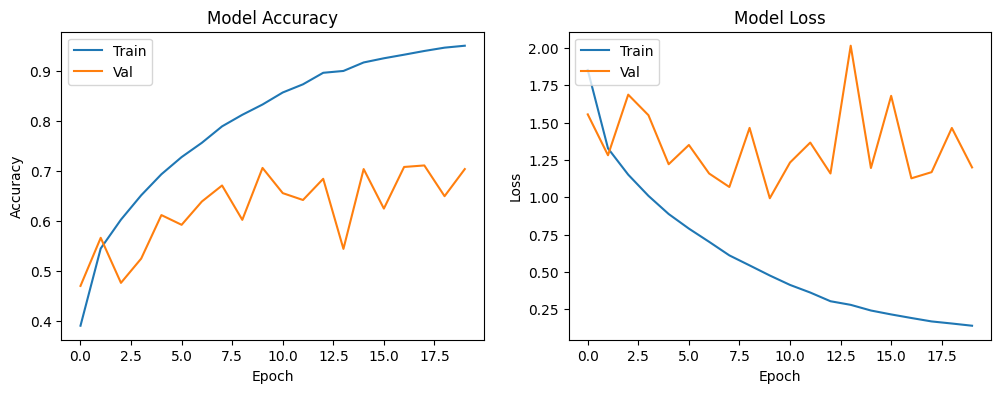

In [34]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting accuracy
ax[0].plot(history.history['accuracy'])  # Training accuracy
ax[0].plot(history.history['val_accuracy'])  # Validation accuracy
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

# Plotting loss
ax[1].plot(history.history['loss'])  # Training loss
ax[1].plot(history.history['val_loss'])  # Validation loss
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

plt.show()


### Data Augmentation

As you've seen, training a convolutional neural network can be quite a long process, even when resources such as GPU are available. Moreover, the progress can be quite slow in terms of improved performance over time - our results in the previous run were not particularly impressive! As we see in the plots, the validation dataset seems to flatten over time in performance, whereas the training is almost perfect. This is an indicator of overfitting in our model. Nevertheless, there are some techniques than can help with this situation. Data augmentation refers to applying transformations during training such that the network learns that a cat is still a cat even if it, for instance, rotated!. Augmentation can be particularly useful when dealing with small datasets, as it is a way to "have more information" without the burden of labeling more data.

**SPOILER**: The training process is going to be even slower than before...

**Task 9**

Let's re-define the input pipeline but, this time, we apply some data augmentation: 
- Zoom-in: We will randmonly resize the images between 224 and 256 and apply a random crop of 224 to fake the zoom effect. 
- Brightness and contrast: We will manipulate the pixel intensity.
- Flipping: We will apply flipping with a probability of 0.5.

**Functions to use**:
- *tf.random.uniform*
- *tf.image.random_crop*
- *tf.image.random_brightness*
- *tf.image.random_contrast*
- *tf.less*
- *tf.cond*
- *tf.image.flip_left_right*
- *tf.identity*

**Note**. When building a *tf.data* pipeline, it is highly recommended to use the built-in functions in TensorFlow to avoid issues. Despite the computational benefits, building input pipelines with this API can be a source of problems due to the graph nature of TensorFlow. That's the reason why we are going to implement some of the augmentations in a "strange" way. 

In [35]:
def image_preprocessing_aug(path_image, labels):
   
    # Read raw image and decode with 3 channels
    image =  tf.io.read_file(path_image) # Type your solution here
    
    # Decode raw image, add argument channels=3
    image =  tf.io.decode_jpeg(image, channels=3)
    
    # Zoom-in (resize + cropping)
    # Create random variable between 0 and 32 
    resize_random = tf.random.uniform([], minval=0, maxval=32, dtype=tf.int32) # Type your solution
    # Rescale between 224 + resize_random
    image = tf.image.resize(image, [224 + resize_random, 224 + resize_random]) # Type your solution
    # Randomly crop to (224, 224, 3)
    image = tf.image.random_crop(image, size=[224, 224, 3]) # Type your solution
    
    # Rescaling
    image =  image / 255.0 # Type your solution
    
    # Brightness. Facotr of 0.1
    image = tf.image.random_brightness(image, max_delta=0.1) # Type your solution
    
    # Contrast. Low factor 0.8 and upper factor 1.2
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2) # Type your solution
    
    # Flipping
    # Create random variable between 0 and 1 
    flip_random = tf.random.uniform([], minval=0.0, maxval=1.0, dtype=tf.float32) # Type your solution
    # Create boolean according to 0.5 threhsold
    flip_cond = tf.less(flip_random, 0.5) # Type your solution
    # If flip_cond: flip image. Otherwise, copy the original image.
    image = tf.cond(flip_cond, lambda: tf.image.flip_left_right(image), lambda: tf.identity(image)) # Type your solution
    
    return image, labels

def create_dataset_aug(data, batch_size):
    
    # Create dataset object. Use (data['filename'], data['encoded_labels']) as input data.
    dataset = tf.data.Dataset.from_tensor_slices((data['filename'], data['encoded_labels']))
    
    # Map the image_preprocessing_aug function (assuming you've defined this function with the augmentation steps)
    dataset = dataset.map(image_preprocessing_aug, num_parallel_calls=tf.data.AUTOTUNE)
    
    # Add batch information and prefetch for performance
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return dataset



Display the same sample generated after applying different augmentations.

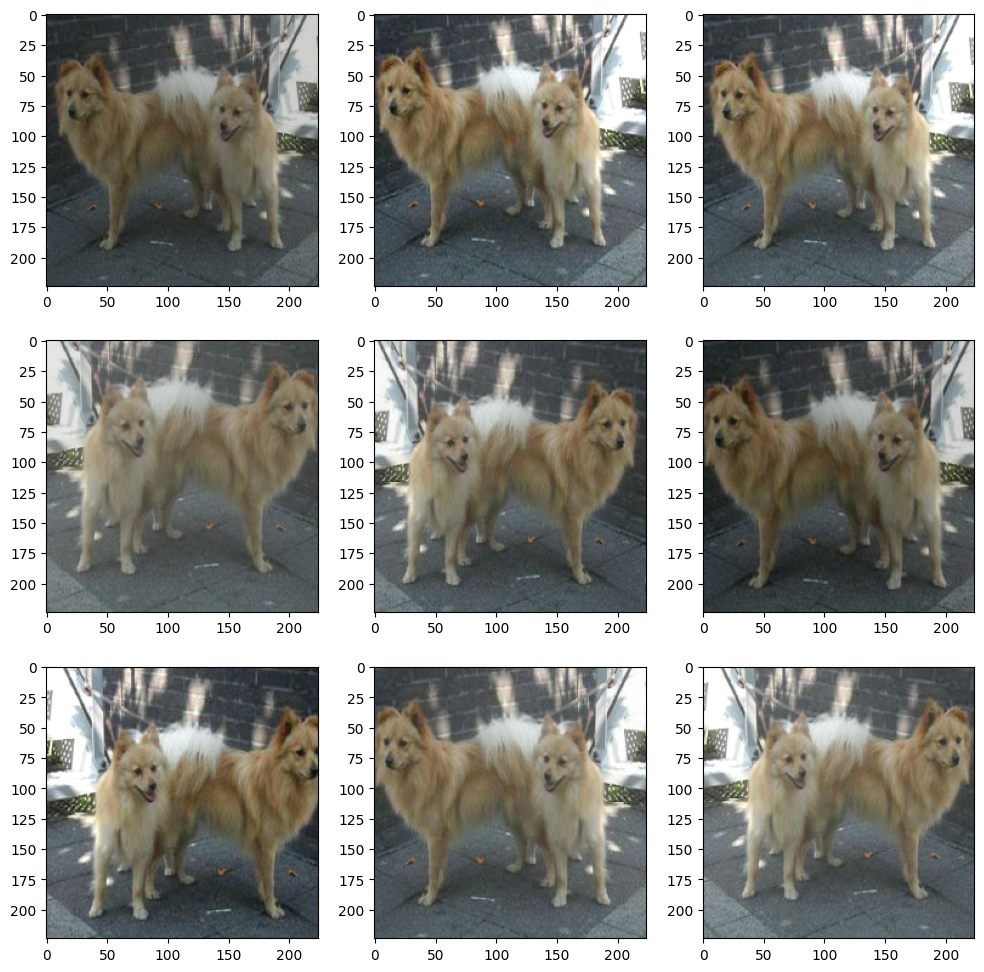

In [36]:
# Extact only one sample
sample = df.sample(1)   # Type your solution here
sample_aug = create_dataset_aug(sample, batch_size=1)

plt.figure(figsize=(12, 12))

for i in range(0, 9):
    img = next(iter(sample_aug))[0][0]
    plt.subplot(3, 3, i+1)
    plt.imshow(tf.cast(img, tf.float32))

# plt.tight_layout()
plt.show()

**Task 10** 

Let's train a new model with the new generators for 10 epochs. Compile the model and train it with the same configuration previously used. Plot the new validation/train curves.

**Note**: Be careful, since we want to apply the augmentations ONLY to the training set. 

In [37]:
# Augmented training data
train_dataset_aug  = create_dataset_aug(train_df, batch_size=32) # Type your solution here

# Create model
model =  create_basic_model(input_shape) # Type your solution here.

# Use compile with the right loss, optimizer and metrics
model.compile(loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              optimizer='SGD',
              metrics=['accuracy']) # Type your solution here.

# Training
history = model.fit(
    x= train_dataset_aug, # Type your solution here (use the training dataset)
    validation_data=valid_dataset, # Type your solution here (use the validation dataset),
    epochs=10, # Type your solution here
    verbose=2,
    callbacks=LearningRateLogger()
)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,242,282 (4.74 MB)

 Trainable params: 1,241,930 (4.74 MB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/10
Epoch 1: Learning rate is 0.009999999776482582
655/655 - 28s - 42ms/step - accuracy: 0.3835 - loss: 1.8872 - val_accuracy: 0.2987 - val_loss: 2.5480
Epoch 2/10
Epoch 2: Learning rate is 0.009999999776482582
655/655 - 18s - 27ms/step - accuracy: 0.5186 - loss: 1.3898 - val_accuracy: 0.4400 - val_loss: 1.8292
Epoch 3/10
Epoch 3: Learning rate is 0.009999999776482582
655/655 - 18s - 28ms/step - accuracy: 0.5673 - loss: 1.2523 - val_accuracy: 0.4217 - val_loss: 1.7523
Epoch 4/10
Epoch 4: Learning rate is 0.009999999776482582
655/655 - 19s - 28ms/step - accuracy: 0.6056 - loss: 1.1494 - val_accuracy: 0.5985 - val_loss: 1.1948
Epoch 5/10
Epoch 5: Learning rate is 0.009999999776482582
655/655 - 19s - 30ms/step - accuracy: 0.6278 - loss: 1.0732 - val_accuracy: 0.6008 - val_loss: 1.1840
Epoch 6/10
Epoch 6: Learning rate is 0.009999999776482582
655/655 - 19s - 30ms/step - accuracy: 0.6530 - loss: 1.0069 - val_accuracy: 0.5626 - val_loss: 1.3317
Epoch 7/10
Epoch 7: Learning rate is 0.0

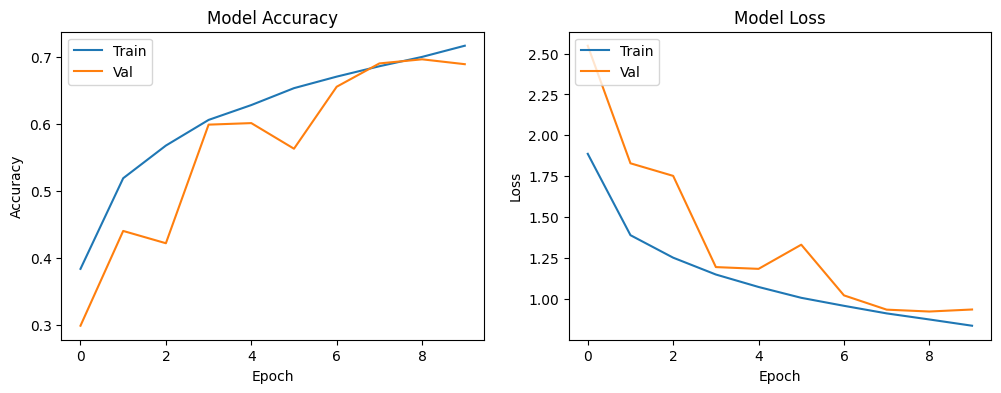

In [38]:
# # Plot the accuracy curves
# f,ax=plt.subplots(1,2,figsize=(12,4))

# ax[0].plot() # Type your solution
# ax[0].plot() # Type your solution
# ax[0].set_title('model accuracy')
# ax[0].set_ylabel('accuracy')
# ax[0].set_xlabel('epoch')
# ax[0].legend(['train', 'val'], loc='upper left')

# ax[1].plot() # Type your solution
# ax[1].plot() # Type your solution
# ax[1].set_title('model loss')
# ax[1].set_ylabel('loss')
# ax[1].set_xlabel('epoch')
# ax[1].legend(['train', 'val'], loc='upper left')

# x = plt.subplots(1, 2, figsize=(12, 4))
f,ax=plt.subplots(1,2,figsize=(12,4))
# Plotting accuracy
ax[0].plot(history.history['accuracy'])  # Training accuracy
ax[0].plot(history.history['val_accuracy'])  # Validation accuracy
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

# Plotting loss
ax[1].plot(history.history['loss'])  # Training loss
ax[1].plot(history.history['val_loss'])  # Validation loss
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

plt.show()


### Transfer Learning

As you've verified, data augmentation may offer improvement over the basic convolutional setting. In this case, with the same amount of epochs, the validation performance is similar than the previous experiment, but there is still room for improving on the training set (and, hopefully, on the validation set as well). Although the more preprocessing steps we add to our generator the slower the training process is, this technique usually helps the model to generalize better. Let's try a different thing... Like it has been mentioned, transfer learning is a really common approach to DL problems. A lot of tasks/datasets benefit from using ImageNet pretrained weights. Let's try to use them and see the effect on our task! 

**Task 11** 

Create a model that makes use of ImageNet pretraining weights. Make use of keras.applications VGG16. Don't include the classification head (top) of VGG16, we will add our own custom one instead. USe GlobalMaxPooling2D to flatten the output of VGG16 and then add a Dense layer with 512 hidden units and ReLU activation. Following, add a Dropout layer with 0.5 probability. Finally, add a Dense layer with the right number of units and activation function. Finally, we will freeze the whole architecture except the last 3 layers (corresponding to the extra FC layer and the classifier). Feel free to experiment with the number of frozen layers to see the effect of fine-tuning different layers.

In [39]:
from tensorflow.keras.applications import VGG16

# Which input shape? Remember to include the number of channels...
input_shape = (224, 224, 3)  # Type your solution here.

# # How many classes?
num_classes = 10  # Type your solution here.

# Number of trainable layers
TRAINABLE_LAYERS =  3 # Type your solution here.

def create_ImageNet_model(input_shape, TRAINABLE_LAYERS): # Type your solution here.

    vgg16 = VGG16(input_shape=input_shape, include_top=False, weights="imagenet") # Type your solution here

    # Flatten the output layer to 1 dimension with GlobalMaxPooling2D()
    x =  GlobalMaxPooling2D()(vgg16.output)# Type your solution here
    
    # Add a fully connected layer with 512 hidden units and ReLU activation
    x =  Dense(512, activation='relu')(x) # Type your solution here
    
    # Add a dropout rate of 0.5
    x =  Dropout(0.5)(x) # Type your solution here
    
    # Add a final layer to classify
    output =  Dense(num_classes, activation='softmax')(x) # Type your solution here

    # Create a Model with the right input and output.
    model = Model(inputs=vgg16.input, outputs=output) # Type your solution here
    
    # Loop over the layers that we want to set as trainable (True).
    # Leave the rest of layers frozen (False)
    for layer in model.layers[:-TRAINABLE_LAYERS]:
        layer.trainable = False # Type your solution here
    
    for layer in model.layers[-TRAINABLE_LAYERS:]:
        layer.trainable = True # Type your solution here

    # Print a summary of the model to make sure there are no disconnected elements.
    # Type your solution here
    model.summary()
    
    return model

**Task 12** 

Transfer learning has not only benefits in terms of final performance but also in terms of training speed and convergence - it is the right moment to introduce an early stopping mechanism!. Such approach pre-defines a criteria to stop the training if certain conditions are met. For intstance, if the validation loss does not improve for 5 epochs -> training is stopped. Implement the early stopping callback and monitorize the validation loss. Stop the training if there is no improvement for more than 5 consecutive epochs. You should take into account that the point in which the training has been stopped is probably not the optimal one in terms of performance. That is why, usually, we make use of another callback in addition to early stopping. Create a model checkpoint callback. We will recover (load the weights) of the best epoch in terms of performance after the early stopping has been triggered. The checkpoint should focus on maximum model accuracy. Save the best weights only.

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Type your solution here (choose the right values)
es = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=5)

# Type your solution here
mc = ModelCheckpoint('best_model.keras', monitor="val_accuracy", mode="max", verbose=1, save_best_only=True)

In [48]:
import os

# List files in the working directory
print(os.listdir('/kaggle/working/'))


['sample.txt', '.virtual_documents', 'state.db']


**Task 13** 

Train the VGG16 for 20 epochs. In this case, VGG16 is known to work better with SGD as optimizer. We'll use the same learning rate schedule. Plot the new validation/train curves.

In [49]:
# Create model
model_imgnet = create_ImageNet_model(input_shape, TRAINABLE_LAYERS) # Type your solution here

# Use compile with the right loss, optimizer and metrics
model_imgnet.compile(loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              optimizer='SGD',
              metrics=['accuracy']) # Type your solution here

# Training
history_imgnet = model_imgnet.fit(
    x= train_dataset_aug, # Type your solution here (use the training dataset)
    validation_data=valid_dataset, # Type your solution here (use the validation dataset),
    epochs=20, # Type your solution here
    verbose=2,
    callbacks=[LearningRateLogger(),es, mc]
) # Type your solution here

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
Epoch 1: Learning rate is 0.009999999776482582

Epoch 1: val_accuracy improved from -inf to 0.72116, saving model to best_model.keras
655/655 - 50s - 76ms/step - accuracy: 0.5563 - loss: 1.3374 - val_accuracy: 0.7212 - val_loss: 0.8936
Epoch 2/20
Epoch 2: Learning rate is 0.009999999776482582

Epoch 2: val_accuracy improved from 0.72116 to 0.76012, saving model to best_model.keras
655/655 - 44s - 68ms/step - accuracy: 0.6961 - loss: 0.9171 - val_accuracy: 0.7601 - val_loss: 0.7618
Epoch 3/20
Epoch 3: Learning rate is 0.009999999776482582

Epoch 3: val_accuracy improved from 0.76012 to 0.78380, saving model to best_model.keras
655/655 - 44s - 68ms/step - accuracy: 0.7291 - loss: 0.8033 - val_accuracy: 0.7838 - val_loss: 0.6794
Epoch 4/20
Epoch 4: Learning rate is 0.009999999776482582

Epoch 4: val_accuracy improved from 0.78380 to 0.79679, saving model to best_model.keras
655/655 - 44s - 68ms/step - accuracy: 0.7540 - loss: 0.7384 - val_accuracy: 0.7968 - val_loss: 0.6420
Epo

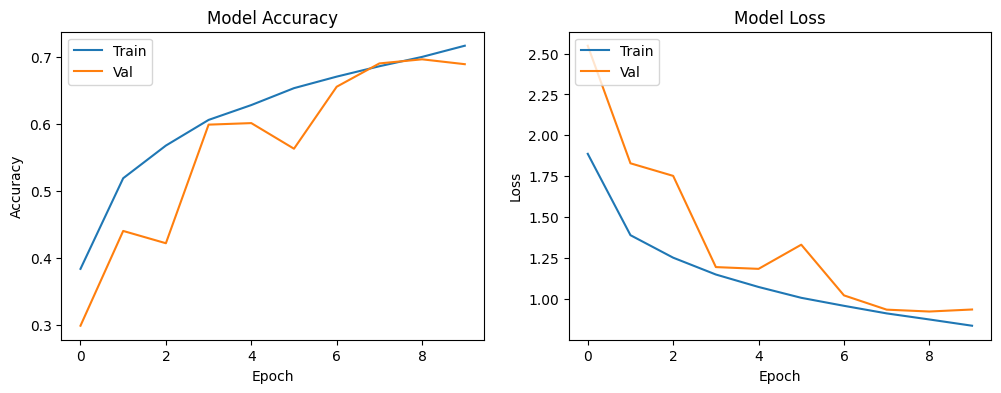

In [50]:
# # Plot the accuracy curves
# f,ax=plt.subplots(1,2,figsize=(12,4))

# ax[0].plot() # Type your solution
# ax[0].plot() # Type your solution
# ax[0].set_title('model accuracy')
# ax[0].set_ylabel('accuracy')
# ax[0].set_xlabel('epoch')
# ax[0].legend(['train', 'val'], loc='upper left')

# ax[1].plot() # Type your solution
# ax[1].plot() # Type your solution
# ax[1].set_title('model loss')
# ax[1].set_ylabel('loss')
# ax[1].set_xlabel('epoch')
# ax[1].legend(['train', 'val'], loc='upper left')


f,ax=plt.subplots(1,2,figsize=(12,4))
# Plotting accuracy
ax[0].plot(history.history['accuracy'])  # Training accuracy
ax[0].plot(history.history['val_accuracy'])  # Validation accuracy
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

# Plotting loss
ax[1].plot(history.history['loss'])  # Training loss
ax[1].plot(history.history['val_loss'])  # Validation loss
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

plt.show()

**Task 14**

We see that we can benefit a lot of pretrained models. With just a few epochs, we have been able to outperform previous models with a basic CNN architecture. For the next tasks, we will load the weights of the best epoch in terms of performance of our trained VGG16 in order to evaluate the model. We will use the test set for this purpose.

In [51]:
import itertools

def plot_confusion_matrix(cm: np.array, 
                          classes: list, 
                          title: str = 'Confusion matrix', 
                          cmap: object = plt.cm.YlGn):
    """
    This function prints and plots the confusion matrix (cm). Normalization 
    can be applied by setting 'normalize=True'.
    
    Parameters: 
    ----------
    cm : np.array
        Confusion matrix.
    classes : list
        Data labels.
    normalize : bool, optional
        Apply or not normalization. The default is False.
    title : str, optional
        Title of the image. The default is 'Confusion matrix'.
    cmap : object, optional
        Color map. The default is 'plt.cm.YlGn'.
        
    Returns
    -------
    None
    
    """       
    
    plt.figure(figsize=(8, 8), dpi=144, facecolor='w', edgecolor='k')       
    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm_norm.max() / 2.
    
    plt.imshow(cm_norm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    plt.title(title, fontsize=7)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=7, wrap=True)
    plt.yticks(tick_marks, classes, fontsize=7, wrap=True)
  
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm = cm.astype('int')
        plt.text(j, i, (("%.2f (%d)" % (cm_norm[i, j], cm[i, j]))),
                     horizontalalignment="center", fontsize=7,
                     color="white" if cm_norm[i, j] > thresh else "black")
    
    plt.ylabel('True Label', fontsize=7)
    plt.xlabel('Predicted Label', fontsize=7)
    plt.tight_layout()

In [52]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the model
saved_model = load_model('/kaggle/working/best_model.keras') # Type your solution here

# Define test dataset
test_dataset =  create_dataset(test_df, batch_size=32)# Type your solution here

In [61]:
# Extract all labels from the test dataset
test_labels = []
for _, labels in test_dataset:
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)
test_labels


array([6, 4, 4, ..., 2, 6, 4], dtype=int32)

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step
Accuracy test: 0.839572192513369


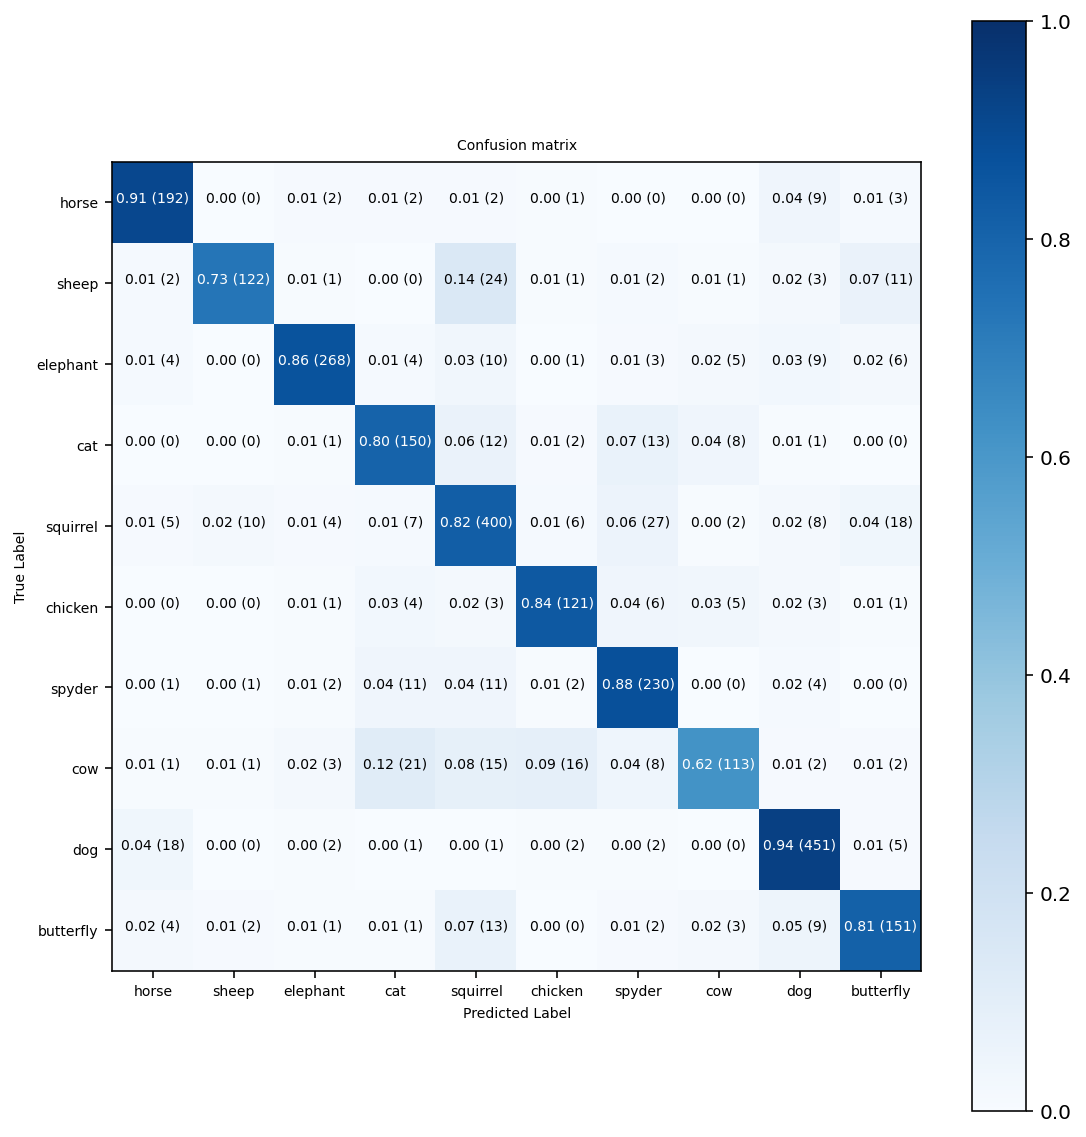

In [67]:
# Use the test set
predictions =  model_imgnet.predict(test_dataset) # Type your solution here

# Threshold the predictions and apply argmax to get the class (axis=1)
class_pred =  np.argmax(predictions, axis=1) # Type your solution here

# Convert class_pred to categoricals
class_pred_list =  class_pred # Type your solution here

# Extract true labels from the test dataset
test_labels = []
for _, labels in test_dataset:
    test_labels.extend(labels.numpy())
test_labels = np.array(test_labels)

# Check if lengths match
assert len(test_labels) == len(class_pred), "Mismatch between true labels and predictions length"

# Create confusion matrix
conf_mat = confusion_matrix(test_labels, class_pred_list, labels=np.unique(test_labels))  # Type your solution here

# Obtain accuracy with argmax
acc_test = accuracy_score(test_labels, class_pred_list) # Type your solution

print("Accuracy test:", acc_test)

plot_confusion_matrix(cm=conf_mat, classes=df['labels'].unique(),
                      title='Confusion matrix', cmap='Blues')

**Task 15**

Obtain a sklearn report (F1, precision and recall) of the test set.

**Q3**: What all these parameters stand for? Accuracy, Precision, Recall, F1-Score, Micro Average, Macro Average and Weighted Average.

In [68]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(test_labels, class_pred_list, target_names=df['labels'].unique()) # Type your solution here

print(report)

              precision    recall  f1-score   support

       horse       0.85      0.91      0.88       211
       sheep       0.90      0.73      0.81       167
    elephant       0.94      0.86      0.90       310
         cat       0.75      0.80      0.77       187
    squirrel       0.81      0.82      0.82       487
     chicken       0.80      0.84      0.82       144
      spyder       0.78      0.88      0.83       262
         cow       0.82      0.62      0.71       182
         dog       0.90      0.94      0.92       482
   butterfly       0.77      0.81      0.79       186

    accuracy                           0.84      2618
   macro avg       0.83      0.82      0.82      2618
weighted avg       0.84      0.84      0.84      2618



**Task 16**

Let's show the some examples of the test set with their predictions. Not too bad, isn't it?

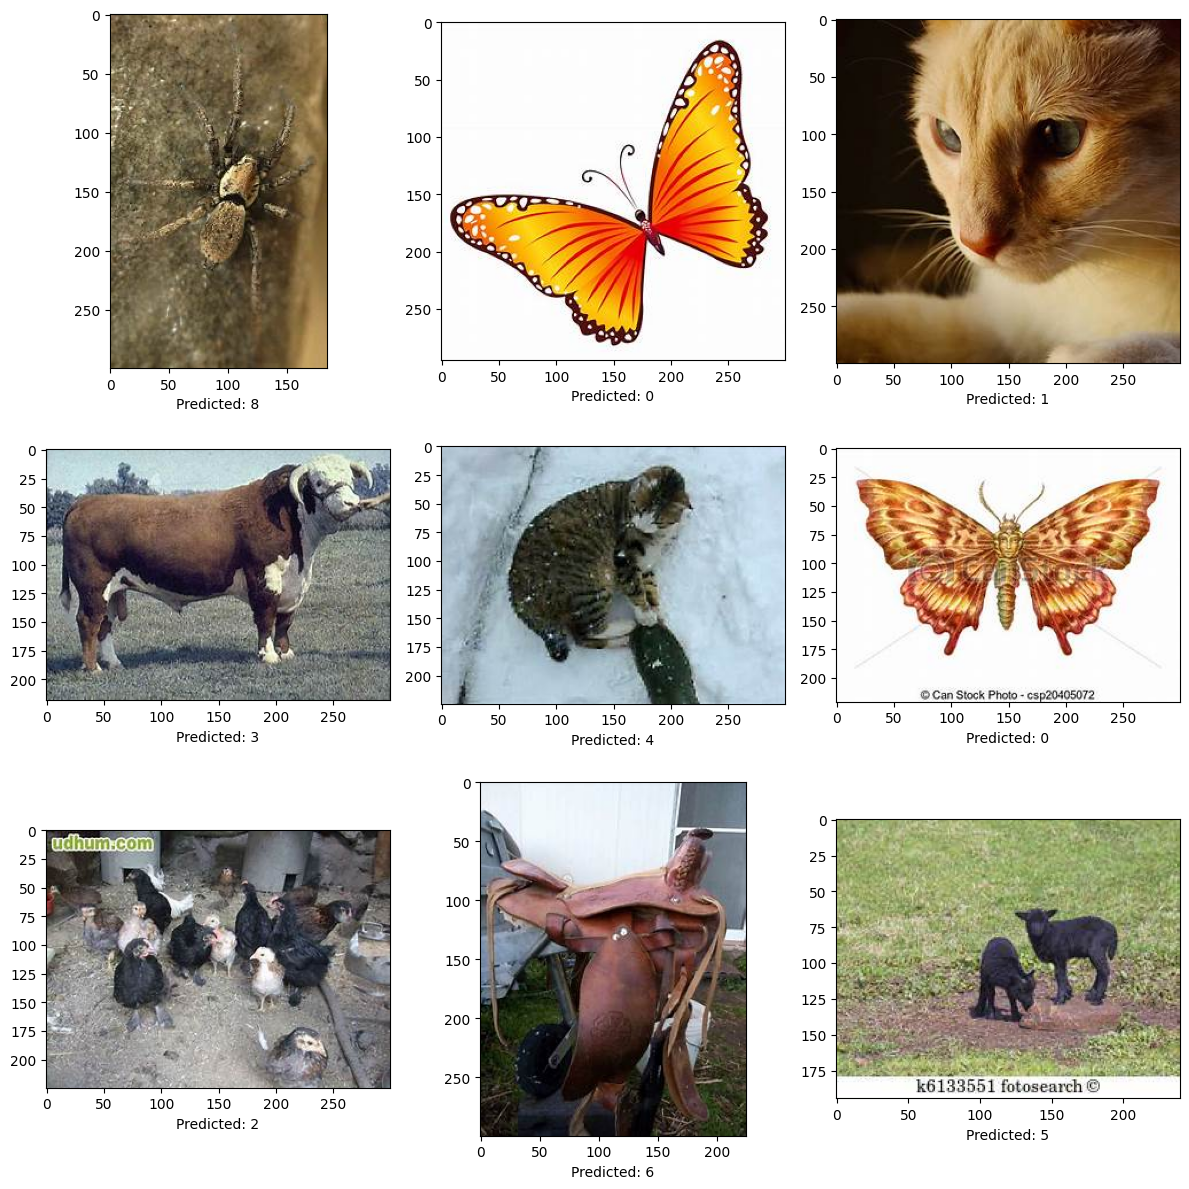

In [80]:

# Add the predicted labels to our test dataset
test_df['predicted_labels'] = class_pred_list # Type your solution here

# Extract 9 random samples
sample_test = test_df.sample(9).reset_index(drop=True)

plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['predicted_labels']
    img = Image.open(filename).convert("RGB")
    plt.subplot(3, 3, index + 1)  # Create a 3x3 grid of subplots
    plt.imshow(img)
    plt.xlabel(f"Predicted: {category}")
plt.tight_layout()
plt.show()


### QUESTIONS

**Q1** (Task 2): There many techniques to resample the datasets. One could be to generate new samples for the minority class by applying transformations such as rotation, zooming, brigntness change or cropping

**Q2** (Task 7): 

**Q3** (Task 15):
